In [35]:
#import pandas as pd 
import numpy as np
import scipy.sparse as sp
import konlpy
from konlpy.tag import Mecab
from sklearn.preprocessing import normalize
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [36]:
import pandas as pd
ref=pd.read_excel('class_keyword.xlsx')
ref=ref.drop(ref.columns[[0]],axis=1)
ref.head()

,text,Class
0,여독풀기 좋은 장소 하루 종일 여행 후 피로를 녹이기 좋은 장소. 주차도 잘 됩니다...,1
1,해운대 달맞이고개의 찜질방. 찜질하는 찜질방입니다. 스파도 같이 운영합니다. 방문객...,1
2,오션뷰에서 엄청싸게 숙박 돌아가는 비행기가 다음 날 아침 편이었기 때문에 이날은 숙...,1
3,"바다온천 베스타스파의 가장 멋진점은, 탕에 들어가면 바다에서 목욕하는 듯한 느낌이 ...",1
4,전면 유리 밖으로 해운대 바다랑 광안대교가 보입니다 할머니랑 엄마랑 같이 밤에 한번...,1


In [37]:
docs_per_class=ref.groupby(['Class'],as_index=False).agg({'text':lambda x:' '.join(x.dropna())})
docs_per_class[:]

,Class,text
0,1,여독풀기 좋은 장소 하루 종일 여행 후 피로를 녹이기 좋은 장소. 주차도 잘 됩니다...
1,2,경치 최고 찜질방에서 하루 숙박했습니다. 달맞이길 윗쪽에 위치해서 해운대 일대가 한...
2,3,"달맞이 고개의 훌륭한 목욕탕 달맞이 고개에 자리하고 있으며, 고지대에 위치한 덕분에..."
3,4,"달맞이 고개의 훌륭한 목욕탕 달맞이 고개에 자리하고 있으며, 고지대에 위치한 덕분에..."
4,5,경치 최고 찜질방에서 하루 숙박했습니다. 달맞이길 윗쪽에 위치해서 해운대 일대가 한...
5,6,여독풀기 좋은 장소 하루 종일 여행 후 피로를 녹이기 좋은 장소. 주차도 잘 됩니다...
6,7,경치 최고 찜질방에서 하루 숙박했습니다. 달맞이길 윗쪽에 위치해서 해운대 일대가 한...
7,8,여독풀기 좋은 장소 하루 종일 여행 후 피로를 녹이기 좋은 장소. 주차도 잘 됩니다...
8,9,여독풀기 좋은 장소 하루 종일 여행 후 피로를 녹이기 좋은 장소. 주차도 잘 됩니다...
9,10,위대한 몇 시간 편안한 휴식은 훌륭한 곳으로 놀고 뜨거운 물을 즐길 수 있습니다.야...


# 각 문장들 토큰화 후 형태소 추출

In [38]:
mecab=Mecab(dicpath="C:\mecab\mecab-ko-dic")
docs_per_class['token']=docs_per_class['text'].apply(mecab.pos)
docs_per_class.head()

,Class,text,token
0,1,여독풀기 좋은 장소 하루 종일 여행 후 피로를 녹이기 좋은 장소. 주차도 잘 됩니다...,"[(여독, NNG), (풀, VV), (기, ETN), (좋, VA), (은, ET..."
1,2,경치 최고 찜질방에서 하루 숙박했습니다. 달맞이길 윗쪽에 위치해서 해운대 일대가 한...,"[(경치, NNG), (최고, NNG), (찜질방, NNG), (에서, JKB), ..."
2,3,"달맞이 고개의 훌륭한 목욕탕 달맞이 고개에 자리하고 있으며, 고지대에 위치한 덕분에...","[(달맞이, NNG), (고개, NNG), (의, JKG), (훌륭, XR), (한..."
3,4,"달맞이 고개의 훌륭한 목욕탕 달맞이 고개에 자리하고 있으며, 고지대에 위치한 덕분에...","[(달맞이, NNG), (고개, NNG), (의, JKG), (훌륭, XR), (한..."
4,5,경치 최고 찜질방에서 하루 숙박했습니다. 달맞이길 윗쪽에 위치해서 해운대 일대가 한...,"[(경치, NNG), (최고, NNG), (찜질방, NNG), (에서, JKB), ..."


In [39]:
def extraction(text_tokens):
    return_list=[]
    for text_token in text_tokens:
        if text_token[1] in ['VV','VA','XR','NNG','VCN']:
            return_list.append(text_token[0])
    return return_list

In [40]:
docs_per_class['token']=docs_per_class['token'].apply(extraction)
docs_per_class.head()

,Class,text,token
0,1,여독풀기 좋은 장소 하루 종일 여행 후 피로를 녹이기 좋은 장소. 주차도 잘 됩니다...,"[여독, 풀, 좋, 장소, 하루, 종일, 여행, 후, 피로, 녹이, 좋, 장소, 주..."
1,2,경치 최고 찜질방에서 하루 숙박했습니다. 달맞이길 윗쪽에 위치해서 해운대 일대가 한...,"[경치, 최고, 찜질방, 하루, 숙박, 달맞이, 길, 위치, 해운대, 한눈, 보이,..."
2,3,"달맞이 고개의 훌륭한 목욕탕 달맞이 고개에 자리하고 있으며, 고지대에 위치한 덕분에...","[달맞이, 고개, 훌륭, 목욕탕, 달맞이, 고개, 자리, 고지대, 위치, 덕분, 목..."
3,4,"달맞이 고개의 훌륭한 목욕탕 달맞이 고개에 자리하고 있으며, 고지대에 위치한 덕분에...","[달맞이, 고개, 훌륭, 목욕탕, 달맞이, 고개, 자리, 고지대, 위치, 덕분, 목..."
4,5,경치 최고 찜질방에서 하루 숙박했습니다. 달맞이길 윗쪽에 위치해서 해운대 일대가 한...,"[경치, 최고, 찜질방, 하루, 숙박, 달맞이, 길, 위치, 해운대, 한눈, 보이,..."


In [41]:
def make_word(text_tokens):
    return_word=[]
    temp=""
    for text_token in text_tokens:
        temp+=text_token
        temp+=" "
    return_word.append(temp)
    return return_word

In [42]:
docs_per_class['text']=docs_per_class['token'].apply(make_word)
docs_per_class.text=list(map(str,docs_per_class.text))
docs_per_class.text

0     ['여독 풀 좋 장소 하루 종일 여행 후 피로 녹이 좋 장소 주차 바다 풍경 좋 찜...
1     ['경치 최고 찜질방 하루 숙박 달맞이 길 위치 해운대 한눈 보이 최고 위치 있 숙...
2     ['달맞이 고개 훌륭 목욕탕 달맞이 고개 자리 고지대 위치 덕분 목욕탕 해운대 아경...
3     ['달맞이 고개 훌륭 목욕탕 달맞이 고개 자리 고지대 위치 덕분 목욕탕 해운대 아경...
4     ['경치 최고 찜질방 하루 숙박 달맞이 길 위치 해운대 한눈 보이 최고 위치 있 숙...
5     ['여독 풀 좋 장소 하루 종일 여행 후 피로 녹이 좋 장소 주차 바다 풍경 좋 찜...
6     ['경치 최고 찜질방 하루 숙박 달맞이 길 위치 해운대 한눈 보이 최고 위치 있 숙...
7     ['여독 풀 좋 장소 하루 종일 여행 후 피로 녹이 좋 장소 주차 바다 풍경 좋 찜...
8     ['여독 풀 좋 장소 하루 종일 여행 후 피로 녹이 좋 장소 주차 바다 풍경 좋 찜...
9     ['위대 시간 편안 휴식 훌륭 곳 놀 물 있 야외 공간 포함 수영장 수영장 선택 있...
10    ['여독 풀 좋 장소 하루 종일 여행 후 피로 녹이 좋 장소 주차 바다 풍경 좋 찜...
11    ['경치 최고 찜질방 하루 숙박 달맞이 길 위치 해운대 한눈 보이 최고 위치 있 숙...
12    ['경치 최고 찜질방 하루 숙박 달맞이 길 위치 해운대 한눈 보이 최고 위치 있 숙...
13    ['여독 풀 좋 장소 하루 종일 여행 후 피로 녹이 좋 장소 주차 바다 풍경 좋 찜...
14    ['경치 최고 찜질방 하루 숙박 달맞이 길 위치 해운대 한눈 보이 최고 위치 있 숙...
15    ['경치 최고 찜질방 하루 숙박 달맞이 길 위치 해운대 한눈 보이 최고 위치 있 숙...
Name: text, dtype: object

# TF구하기

# C-TF-IDF 행렬생성

In [43]:
class CTFIDFVectorizer(TfidfTransformer):
    def __intit__(self,*args,**kwargs):
        super(CTFIDFVectoerizer,self).__init__(*args,**kwargs)
    
    def fit(self,X:sp.csr_matrix, n_samples: int):
        """Learn ther idf vector (global term weights)"""
        _, n_features=X.shape
        df=np.squeeze(np.asarray(X.sum(axis=0)))
        idf=np.log(n_samples/df)
        self._idf_diag=sp.diags(idf,offsets=0, shape=(n_features,n_features),format='csr',dtype=np.float64)
        
        return self
    
    
    def transform(self, X:sp.csr_matrix)->sp.csr_matrix:
        """Transform a count=based matrix to c -TF-IDF"""
        X=X*self._idf_diag
        X=normalize(X,axis=1,norm='l1',copy=False)
        return X

In [48]:
count_vectorizer=CountVectorizer().fit(docs_per_class.text)
count=count_vectorizer.transform(docs_per_class.text)
print(count[1])
words=count_vectorizer.get_feature_names()

  (0, 2)	2
  (0, 4)	2
  (0, 5)	1
  (0, 6)	1
  (0, 7)	2
  (0, 11)	2
  (0, 12)	1
  (0, 14)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 21)	1
  (0, 23)	1
  (0, 24)	4
  (0, 25)	1
  (0, 27)	481
  (0, 28)	668
  (0, 29)	5
  (0, 30)	2
  (0, 31)	3
  (0, 32)	4
  (0, 33)	1
  (0, 35)	10
  (0, 36)	1
  (0, 37)	3
  :	:
  (0, 11615)	13
  (0, 11616)	26
  (0, 11617)	9
  (0, 11618)	3
  (0, 11619)	42
  (0, 11620)	4
  (0, 11621)	1
  (0, 11622)	1
  (0, 11624)	17
  (0, 11625)	1
  (0, 11626)	2
  (0, 11627)	1
  (0, 11628)	1
  (0, 11629)	2
  (0, 11630)	11
  (0, 11631)	2
  (0, 11632)	5
  (0, 11633)	1
  (0, 11634)	19
  (0, 11635)	54
  (0, 11636)	2
  (0, 11637)	1
  (0, 11638)	6
  (0, 11639)	141
  (0, 11640)	9


In [52]:
print(count[1].argsort[])

AttributeError: argsort not found

In [13]:
ctfidf=CTFIDFVectorizer().fit_transform(count,n_samples=len(docs_per_class)).toarray()
words_per_class={docs_per_class.Class[label]:[words[index]for index in ctfidf[label].argsort()[-100:]]for label in range(len(docs_per_class.Class))}

In [14]:
count.sum(axis=0)

matrix([[   6,    1,   20, ...,   55, 1243,   97]], dtype=int64)

In [15]:
df=pd.DataFrame(words_per_class)
df.to_excel("c-tf-idf.xlsx",header=False,index=False,encoding='utf-8')

# 각 클래스별 특정 문서에서 특정단어의 등장 수

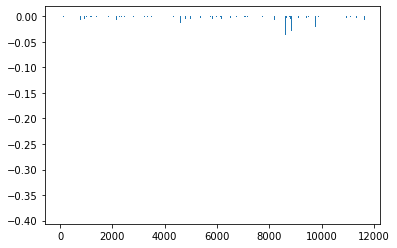

In [25]:
# vect=count_vectorizer, c
import matplotlib.pyplot as plt
count=ctfidf.sum(axis=0)
idx=np.argsort(-count)
feature_name=np.array(words)[idx]
plt.bar(range(len(count)),count)
plt.show()

In [26]:
print(list(zip(feature_name,count))[-100:])

[('발견', -0.11447514349676931), ('명소', 2.2790586985053295e-06), ('저렴', -6.713563384761879e-06), ('준비', 5.146288688704643e-06), ('이용', -5.382299042466939e-05), ('하이킹', 5.262713767142507e-06), ('도로', 2.711200246582854e-06), ('방법', 1.656538976670586e-06), ('공간', 5.530405530783446e-06), ('아침', -1.9939028621079485e-06), ('휴식', -3.5140249535807206e-06), ('시도', 5.637043277489583e-06), ('맛있', -0.00044611563824348987), ('하루', 5.369108317685483e-06), ('풍경', -0.0016338736259781225), ('보이', -1.415453491033008e-05), ('영어', -0.004130207596509649), ('센터', -0.0003230506334446846), ('언덕', -8.278327856322955e-05), ('신선', -1.7547907979028132e-05), ('정류장', -6.438034906500164e-05), ('여름', 3.9796156374865474e-06), ('무료', -2.3119349966113167e-05), ('저녁', -2.0848156640966034e-05), ('유명', -0.0017411655978281783), ('호텔', 6.207707475881801e-06), ('계단', -0.00013246450961490187), ('멋지', 4.561975243700496e-06), ('다음', -0.03338484128650515), ('아이', 2.594953936732543e-06), ('대부분', 5.8802845820361705e-06), ('판매', -0.00

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
distances=cosine_similarity(ctfidf,ctfidf)
np.fill_diagonal(distances,0)
print(distances)
result=pd.DataFrame([(docs_per_class.Class[index],docs_per_class.Class[distances[index].argmax()]) for index in range(len(docs_per_class))],columns=["From","To"])

[[0.         0.96461499 0.94964333 0.90244956 0.97575903 0.97309782
  0.95891424 0.95250132 0.97154461 0.91790063 0.82631085 0.98656358
  0.96595923 0.83801213 0.96641304 0.89002987]
 [0.96461499 0.         0.93974385 0.88241514 0.98607985 0.93031756
  0.98348249 0.95005346 0.97234201 0.91439522 0.82708543 0.96904496
  0.96807417 0.83573721 0.97320753 0.90693923]
 [0.94964333 0.93974385 0.         0.94962679 0.95492337 0.91276898
  0.94226467 0.92706556 0.95325865 0.9182557  0.80787428 0.9563382
  0.9406274  0.8094335  0.93437873 0.85488557]
 [0.90244956 0.88241514 0.94962679 0.         0.90012844 0.83708438
  0.8888329  0.86824484 0.89473079 0.84638352 0.76862934 0.90974282
  0.89488331 0.77723356 0.86761654 0.81037736]
 [0.97575903 0.98607985 0.95492337 0.90012844 0.         0.93945426
  0.98300755 0.97001986 0.98594114 0.9317878  0.84782878 0.9787704
  0.98023738 0.85244494 0.98220045 0.91605268]
 [0.97309782 0.93031756 0.91276898 0.83708438 0.93945426 0.
  0.92239904 0.91212011 0.9

In [28]:
result

,From,To
0,1,12
1,2,5
2,3,12
3,4,3
4,5,2
5,6,1
6,7,2
7,8,9
8,9,5
9,10,9


# 문서 군집화

In [29]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3, max_iter=10000,random_state=42)
cluster_label=kmeans.fit_predict(ctfidf)
docs_per_class['cluster_label']=cluster_label
docs_per_class[:]

,Class,text,token,cluster_label
0,1,['여독 풀 좋 장소 하루 종일 여행 후 피로 녹이 좋 장소 주차 바다 풍경 좋 찜...,"[여독, 풀, 좋, 장소, 하루, 종일, 여행, 후, 피로, 녹이, 좋, 장소, 주...",1
1,2,['경치 최고 찜질방 하루 숙박 달맞이 길 위치 해운대 한눈 보이 최고 위치 있 숙...,"[경치, 최고, 찜질방, 하루, 숙박, 달맞이, 길, 위치, 해운대, 한눈, 보이,...",1
2,3,['달맞이 고개 훌륭 목욕탕 달맞이 고개 자리 고지대 위치 덕분 목욕탕 해운대 아경...,"[달맞이, 고개, 훌륭, 목욕탕, 달맞이, 고개, 자리, 고지대, 위치, 덕분, 목...",0
3,4,['달맞이 고개 훌륭 목욕탕 달맞이 고개 자리 고지대 위치 덕분 목욕탕 해운대 아경...,"[달맞이, 고개, 훌륭, 목욕탕, 달맞이, 고개, 자리, 고지대, 위치, 덕분, 목...",0
4,5,['경치 최고 찜질방 하루 숙박 달맞이 길 위치 해운대 한눈 보이 최고 위치 있 숙...,"[경치, 최고, 찜질방, 하루, 숙박, 달맞이, 길, 위치, 해운대, 한눈, 보이,...",1
5,6,['여독 풀 좋 장소 하루 종일 여행 후 피로 녹이 좋 장소 주차 바다 풍경 좋 찜...,"[여독, 풀, 좋, 장소, 하루, 종일, 여행, 후, 피로, 녹이, 좋, 장소, 주...",1
6,7,['경치 최고 찜질방 하루 숙박 달맞이 길 위치 해운대 한눈 보이 최고 위치 있 숙...,"[경치, 최고, 찜질방, 하루, 숙박, 달맞이, 길, 위치, 해운대, 한눈, 보이,...",1
7,8,['여독 풀 좋 장소 하루 종일 여행 후 피로 녹이 좋 장소 주차 바다 풍경 좋 찜...,"[여독, 풀, 좋, 장소, 하루, 종일, 여행, 후, 피로, 녹이, 좋, 장소, 주...",1
8,9,['여독 풀 좋 장소 하루 종일 여행 후 피로 녹이 좋 장소 주차 바다 풍경 좋 찜...,"[여독, 풀, 좋, 장소, 하루, 종일, 여행, 후, 피로, 녹이, 좋, 장소, 주...",1
9,10,['위대 시간 편안 휴식 훌륭 곳 놀 물 있 야외 공간 포함 수영장 수영장 선택 있...,"[위대, 시간, 편안, 휴식, 훌륭, 곳, 놀, 물, 있, 야외, 공간, 포함, 수...",1


In [30]:
def get_cluster_details(cluster_model,cluster_data,feature_names,cluster_num,top_n_feature=30):
    cluster_details={}
    center_feature_idx=cluster_model.cluster_centers_.argsort()[:,::-1]
    for cluster_num in range(cluster_num):
        cluster_details[cluster_num]={}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        top_ftr_idx = center_feature_idx[cluster_num, :top_n_feature]
        top_ftr = [feature_names[idx] for idx in top_ftr_idx]
        
        top_ftr_val = cluster_model.cluster_centers_[cluster_num, top_ftr_idx].tolist()

        # cluster_details 딕셔너리에다가 개별 군집 정보 넣어주기
        cluster_details[cluster_num]['top_features'] = top_ftr
        cluster_details[cluster_num]['top_featrues_value'] = top_ftr_val
        # 해당 cluster_num으로 분류된 파일명(문서들) 넣어주기
        filenames = cluster_data[cluster_data['cluster_label']==cluster_num]['Class']
        # filenames가 df으로 반환되기 떄문에 값들만 출력해서 array->list로 변환
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['Class'] = filenames
    
    return cluster_details

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print(f"#####Cluster Num: {cluster_num}")
        print()
        print("상위 10개 feature단어들:\n", cluster_detail['top_features'])
        print()
        print(f"Cluster {cluster_num}으로 분류된 문서들:\n{cluster_detail['Class'][:5]}")
        print('-'*20)

In [31]:
cluster_details = get_cluster_details(cluster_model=kmeans,
                                     cluster_data=docs_per_class,
                                     feature_names=words,
                                     cluster_num=3,
                                     top_n_feature=50)
print_cluster_details(cluster_details)

#####Cluster Num: 0

상위 10개 feature단어들:
 ['급수', '바닷가재', '보드게임', '취객', '아상', '드럼통', '바다표범', '채워지', '승시', '밥솥', '기판', '보쌈', '물범', '구서', '식습관', '특산', '탐지기', '휴대용', '레토르트', '제빵', '해물탕', '생동', '별장', '적산', '생크림', '新鮮', '以外', '熱情', '제맛', '市場', '同行', '밀치', '커지', '하이드로', '꽈배기', '장난치', '간지럽', '월부', '찐빵', '매주', '주인집', '식지', '민시', '누에', '최하', '코미디', '외환', '연어', '한판', '이모저모']

Cluster 0으로 분류된 문서들:
[3, 4]
--------------------
#####Cluster Num: 1

상위 10개 feature단어들:
 ['물놀이터', '냇가', '각성', '운동복', '순국선열', '순도', '반할', '대위법', '컨디션', '국전', '대세', '충찰', '일자', '불허', '위병', '억새', '민간인', '제때', '소증', '재외', '머물르', '나지막', '꿋꿋', '구강', '금기', '깜놀', '나세', '끝단', '징가', '적대감', '세이버', '여상', '기법', '넘버원', '갈라', '개꿀', '오월', '낙진', '엔딩', '설득', '공산주의', '산기', '무명용사', '우선시', '금융', '수자원', '소방', '뒷전', '구란', '꿀잠']

Cluster 1으로 분류된 문서들:
[1, 2, 5, 6, 7]
--------------------
#####Cluster Num: 2

상위 10개 feature단어들:
 ['고싶', '편평', '선풍기', '훈계', '보모', '조라', '수목', '이름표', '잠수복', '시위', '미취학', '도래', '요안', '붕우', '영업시간', '전무후무', '요주의', '위락', '개시',

<AxesSubplot:>

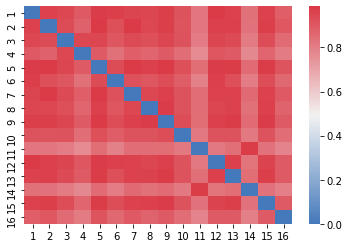

In [32]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(distances,xticklabels=docs_per_class.Class,yticklabels=docs_per_class.Class,cmap=cmap)

In [33]:
from yellowbrick.text.tsne import tsne
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.datasets import load_hobbies
from yellowbrick.text import TSNEVisualizer

x=CTFIDFVectorizer().fit_transform(count,n_samples=len(docs_per_class))
y=docs_per_class.Class

tsne = TSNEVisualizer()
tsne.fit(x, y)
tsne.show()


ImportError: cannot import name 'safe_indexing' from 'sklearn.utils' (C:\Users\pthdu\anaconda3\envs\nltk\lib\site-packages\sklearn\utils\__init__.py)